# COMICSデータ解析手順

### index 

**[0.1 天体画像の選択](#0.1-天体画像の選択)**  
> [0.1.1 headerの取得](#0.1.1-headerの取得)  
<!-- > [0.1.2 プログラミングの進め方](#0.1.2-プログラミングの進め方)  
> [0.1.3 コメント](#0.1.3-コメント)  
> [0.1.4 エラーへの対処方法](#0.1.4-エラーへの対処方法)   -->

**[0.2 ダークの選択、ダーク画像作成](#0.2-ダークの選択)**  
> [0.2.1 headerから天体に合うダークを選ぶ](#0.2.1-headerから天体に合うダークを選ぶ)  
> [0.2.2 1expあたりのダークにする](#0.2.2-1expあたりのダークにする)
<!-- > [0.2.3 プログラムの評価](#0.2.3-プログラムの評価)  
> [0.2.4 条件分岐](#0.2.4-条件分岐)  
> [0.2.5 ループ](#0.2.5-ループ)  
> [0.2.6 関数](#0.2.6-関数)  
> [0.2.7 データ型](#0.2.7-データ型)  
> [0.2.8 練習問題](#0.2.8-練習問題)   -->


**[0.3 フラットの作成](#0.3-フラットの作成)**
> [0.3.1 天体画像からダーク差し引き](#0.3.1-天体画像からダーク差し引き)  
> [0.3.2 chop beamごとに画像を分離](#0.3.2-chopbeamごとに画像を分離)  
> [0.3.3 frame間統計処理, file間統計処理](#0.3.3-frame間統計処理file間統計処理)  
> [0.3.4 gaussian平均、規格化](#0.3.4-gaussian平均、規格化)  
<!-- > [0.3.5 gaussian平均、規格化](#0.3.4-gaussian平均、規格化)   -->

**[0.4 天体画像の解析](#0.4-天体画像の解析)**
> [0.4.1 chop差し引き](#0.4.1-chop差し引き)  
> [0.4.2 パターンノイズ除去](#0.4.2-パターンノイズ除去)  
> [0.4.3 フラットで割る](#0.4.3-フラットで割る)  



## 0.0 読み込み用

In [9]:
import sys  
print(sys.executable)

c:\Users\yyush\AppData\Local\Programs\Python\Python310\python.exe


In [10]:
import pandas as pd
import astropy.io.fits as fits
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import norm
import numpy as np
import glob
import os
from scipy.ndimage import gaussian_filter
%matplotlib inline

In [11]:
#HD142527のファイル
datapath = r'C:\Users\yyush\OneDrive\COMICS\HD142527'
outpath = r'C:\Users\yyush\OneDrive\COMICS\HD142527\out'
darkpath = r'C:\Users\yyush\OneDrive\COMICS\HD142527\DARK'
def readfitsheader(pathname, file):
    filepass = pathname +r'\\' + str(file)
    return fits.open(filepass)[0].header

def readfitsdata(pathname, file):
    filepass = pathname +r'\\' + str(file)
    return fits.open(filepass)[0].data

Q) 天体画像ファイルの選択それぞれについて、ダークを捜すとき、
毎回ファイルを読み込んでヘッダーから判断するのか...??

In [12]:
#　darkのファイルのうち、COMAファイルを取得
path = darkpath
filelist=[]
files = os.listdir(path)
for filename in files:
    if (os.path.isfile(os.path.join(path, filename))) & ("COMA" in filename):
        filelist.append(filename)


#### ダークの判断は、PIXTIM, RRSTRT, YSTRT、日付で判断するといい。

In [13]:
obsheader = readfitsheader(datapath, "COMA00060373.fits")
# darkheader = readfitsheader(darkpath, "COMA00061029.fits")

#この天体のヘッダーと、Q_RRSTRTおよび、Q_PIXTIMが一致するダークファイルを取り出す。
print(obsheader["Q_RRSTRT"])
obsheader["Q_PIXTIM"]
obsdarklist = []
for darkfile in filelist:
    if (obsheader["Q_RRSTRT"] == readfitsheader(darkpath, darkfile)["Q_RRSTRT"])& (obsheader["Q_PIXTIM"] == readfitsheader(darkpath, darkfile)["Q_PIXTIM"]):
        obsdarklist.append(darkfile)
        
obsdarklist # 欲しかったdark二枚を読み込んだ


216


['COMA00061029.fits', 'COMA00061031.fits']

In [14]:
darkheader = readfitsheader(darkpath, obsdarklist[0])
darkheader["DATE-OBS"]

'2005-07-17'

In [15]:
obsheader

SIMPLE  =                    T / Standard FITS format                           
BITPIX  =                   32 / # of bits per pixel                            
NAXIS   =                    4 / of axis in frame                               
NAXIS1  =                  320 / # of pixels/row                                
NAXIS2  =                  240 / # of pixels/row                                
NAXIS3  =                    4 / # of pixels/row                                
NAXIS4  =                    1 / # of pixels/row                                
EXTEND  =                    F / ASCII Extension Table                          
COMMENT   = ' +++++++++++++++++++ SUBARU COMMON'                                
COMMENT   = ' ------------------------- About This DATA'                        
FRAMEID = 'COMA00060373'       /  Data Serial Num of COMICS A-sequence          
EXP-ID  = 'COME00060373'       /  Exporsure ID                                  
OBS-ALOC= 'Observation'     

## 0.1 天体画像の選択

### 0.1.1 headerの読み込み

### 0.1.2

## 0.2 ダークの選択、ダークの処理

### 0.2.1 headerから天体に合うダークを選ぶ
Q_PIXTIM, Q_RRSTRTが同じものを二つ選択する。


In [16]:
#　darkのファイルのうち、COMAファイルを取得
path = darkpath
filelist = []
files = os.listdir(path)
for filename in files:
    if (os.path.isfile(os.path.join(path, filename))) & ("COMA" in filename):
        filelist.append(filename)


In [18]:
obsheader = readfitsheader(datapath, "COMA00060373.fits") # 天体画像
# darkheader = readfitsheader(darkpath, "COMA00061029.fits")

#この天体のヘッダーと、Q_RRSTRTおよび、Q_PIXTIMが一致するダークファイルを取り出す。
obsheader["Q_PIXTIM"]
obsdarklist = []
for darkfile in filelist:
    if (obsheader["Q_RRSTRT"] == readfitsheader(darkpath, darkfile)["Q_RRSTRT"]) & (obsheader["Q_PIXTIM"] == readfitsheader(darkpath, darkfile)["Q_PIXTIM"]):
        obsdarklist.append(darkfile)

obsdarklist  # 欲しかったdark二枚を読み込んだ
darkheader = readfitsheader(darkpath, obsdarklist[1])

In [19]:
darkheader["Q_CHAM"]


SIMPLE  =                    T / Standard FITS format                           
BITPIX  =                   32 / # of bits per pixel                            
NAXIS   =                    4 / of axis in frame                               
NAXIS1  =                  320 / # of pixels/row                                
NAXIS2  =                  240 / # of pixels/row                                
NAXIS3  =                    4 / # of pixels/row                                
NAXIS4  =                    1 / # of pixels/row                                
EXTEND  =                    F / ASCII Extension Table                          
COMMENT   = ' +++++++++++++++++++ SUBARU COMMON'                                
COMMENT   = ' ------------------------- About This DATA'                        
FRAMEID = 'COMA00061031'       /  Data Serial Num of COMICS A-sequence          
EXP-ID  = 'COME00061031'       /  Exporsure ID                                  
OBS-ALOC= 'Observation'     

q_list_statの処理、z方向平均をとる
np.mean(data, axis=1, keepdims=True)

```
q_list_stat ./dark/COMA00049769.fits 1 - - : m49769
q_list_stat ./dark/COMA00049771.fits 1 - - : m49771
q_fcombine m49769 m49771 ave=imgdark40
q_arith imgdark40 / 122 imgdark40_1
```

In [1]:
dark1 = readfitsdata(darkpath, obsdarklist[0])
dark2 = readfitsdata(darkpath, obsdarklist[1])

liststatdark1 = np.mean(dark1, axis=1,keepdims=True)
liststatdark2 = np.mean(dark2, axis=1, keepdims=True)
#q_fcombineの式
meandark = (liststatdark1 + liststatdark2) /2


NameError: name 'readfitsdata' is not defined

In [ ]:
checkdark1 = readfitsdata(datapath, "imgdark2_1")
checkdark2 = readfitsdata(datapath, "imgdark_1")

#### メモ 
CoAddによって、処理を変える必要があるかもしれないので、その検証をする。
CoAddが0のときは、RAWモードであり、この場合は、

### 0.2.2 1Expあたりのダークにする

In [10]:
#q_arithの処理 一枚あたりに変換
meandark_1 = meandark / int(readfitsheader(darkpath, obsdarklist[1])["Q_CHEB"])
check_1 = readfitsdata(darkpath, "imgdark_1")
meandark_1 == check_1
#OK

array([[[[ True,  True,  True, ...,  True,  True,  True],
         [ True,  True,  True, ...,  True,  True,  True],
         [ True,  True,  True, ...,  True,  True,  True],
         ...,
         [ True,  True,  True, ...,  True,  True,  True],
         [ True,  True,  True, ...,  True,  True,  True],
         [ True,  True,  True, ...,  True,  True,  True]]]])

## 0.3 フラットの作成

### 0.3.1 天体画像からダーク差し引き

In [11]:
print(obsheader["Q_CHEB"])
meandark_9 = meandark_1 * obsheader["Q_CHEB"]
#天体画像からダークを引く
obsdata = readfitsdata(datapath, "COMA00060373.fits")
skydata = obsdata - meandark_9

dark2_9 = readfitsdata(darkpath, "imgdark2_9")
skydata_second = obsdata - dark2_9
checksky= readfitsdata(datapath, "sky60373")
checkdark_9 = readfitsdata(datapath, "imgdark_9")
meandark_9 == checkdark_9 #OK
skydata == checksky # false dark2_9で引いていた

checksky == skydata_second


9


array([[[[ True,  True,  True, ...,  True,  True,  True],
         [ True,  True,  True, ...,  True,  True,  True],
         [ True,  True,  True, ...,  True,  True,  True],
         ...,
         [ True,  True,  True, ...,  True,  True,  True],
         [ True,  True,  True, ...,  True,  True,  True],
         [ True,  True,  True, ...,  True,  True,  True]],

        [[ True,  True,  True, ...,  True,  True,  True],
         [ True,  True,  True, ...,  True,  True,  True],
         [ True,  True,  True, ...,  True,  True,  True],
         ...,
         [ True,  True,  True, ...,  True,  True,  True],
         [ True,  True,  True, ...,  True,  True,  True],
         [ True,  True,  True, ...,  True,  True,  True]],

        [[ True,  True,  True, ...,  True,  True,  True],
         [ True,  True,  True, ...,  True,  True,  True],
         [ True,  True,  True, ...,  True,  True,  True],
         ...,
         [ True,  True,  True, ...,  True,  True,  True],
         [ True,  True,  T

### 0.3.2 chop beamごと画像を分離
skydataには、chopping beamが両方はいっているので、それをわける。
その前に、ヘッダーを適切に処理しておく必要があるので、skydataのヘッダーと、COMA*60373のヘッダーを比較してみる。

その後、q_bsepの処理を考える。

#### 0.3.2.1 sky60373のヘッダーと天体ヘッダーの比較→同じならこの時点で、skydataのヘッダーを天体のヘッダーとしたfitsファイルを作成してみる。

In [12]:
sky60373header = readfitsheader(datapath, "sky60373")
# obsheader
# # sky60373header["BITPIX"] = -64
# print(obsheader["BITPIX"] ==32)
# sky60373header
## これら二つは一致しない。原因は後で探る

#### メモ
skydataを作成するとき、python側ではimgdark_9を引いたが、コマンドのときは、imgdark2_9を引いているので、以降の検証のため、元のファイルもimgdark2_9で引いたものにする

In [13]:
sky60373n = readfitsheader(datapath, "sky60373_n")
sky60373n_data = readfitsdata(datapath, "sky60373_n")
sky60373p_data = readfitsdata(datapath, "sky60373_p.fits")
#sky60373のデータからpとnに分離する
skydata.shape

skydata_dim3 = skydata[0,:,:,:]
skydata_dim3.shape
# skydata_dim3_divide = np.split(skydata_dim3,2,axis=0)
skydata_dim3_divide = skydata_dim3[::2,:,:] #偶数飛ばし
#3次元でうまくいったので、4次元でも行う。

#imgdark2_9で引いたもの
skydata_div_p = skydata_second[:,::2,:,:] #positiveは偶数番目
skydata_div_n = skydata_second[:,1::2,:,:]
skydata_div_n == sky60373n_data #True
skydata_div_p == sky60373p_data #True

def q_bsep_posi(input):
    return input[:,::2,:,:]
def q_bsep_nega(input):
    return input[:,1::2,:,:]    

#### q_bsepで分けた後は、z方向平均をとる。これについては、最初に実施済みで、np.mean(data, axis=1, keepdims=True)を使用する

In [49]:
#ここで改めて読み込んでおく
sky60373 = readfitsdata(datapath, "sky60373")
sky60373_p = q_bsep_posi(sky60373)
sky60373_n = q_bsep_nega(sky60373) #これら二つはcheck済み
#z方向平均

sky_p_ave = np.mean(sky60373_p, axis=1, keepdims=True)
sky_n_ave = np.mean(sky60373_n, axis=1, keepdims=True)

#検証
checkskypave = readfitsdata(datapath, "sky60373_p_ave.fits")

array([[[[ True,  True,  True, ...,  True,  True,  True],
         [ True,  True,  True, ...,  True,  True,  True],
         [ True,  True,  True, ...,  True,  True,  True],
         ...,
         [ True,  True,  True, ...,  True,  True,  True],
         [ True,  True,  True, ...,  True,  True,  True],
         [ True,  True,  True, ...,  True,  True,  True]]]])

### 0.3.3 gaussian平均、規格化

In [15]:
def gaussian_fil(datafile, outputfile):
    data = fits.open(datafile)[0].data  # datafileの読み込み
    #gaussian_filterをかける
    data_gauss = gaussian_filter(
        data, sigma=6, order=0, output=None, mode='nearest', cval=0.0, truncate=4.0)
    #このままだと4次元になっているので、次元を二次元にする。
    data_gauss_reshape = data_gauss[0, 0, :, :]
    fits.open(outputfile, data=data_gauss_reshape)

#fileの読み込みのところは後ほど修正


In [16]:
def gaussfilter(input):
    output = gaussian_filter(input[0,0,:,:],sigma=6, order=0, output=None, mode='nearest', cval=0.0, truncate=4.0)
    return output

In [121]:
sky60373_paG = gaussfilter(sky_p_ave)
sky60373_naG = gaussfilter(sky_n_ave)
#check
check_paG = readfitsdata(datapath, "sky60373_paG.fits")
# check_paG - sky60373_paG
sky60373_paG - check_paG
# hdu = fits.PrimaryHDU(data = sky60373_paG)
# hdul = fits.HDUList([hdu])
# hdul.writeto("py_sky_paG.fits",overwrite=True)

array([[ 5.36517327e-05, -4.39268714e-04,  9.68794575e-06, ...,
         6.80389108e-04, -1.08193314e-03, -1.49177453e-04],
       [-7.37867284e-04, -7.92878936e-05, -1.13164673e-04, ...,
        -2.17765598e-03,  7.72384665e-05,  2.13257693e-03],
       [-3.66890855e-04,  3.06107408e-04,  1.50525784e-04, ...,
        -4.38538618e-03, -2.01358722e-04,  3.06954602e-03],
       ...,
       [-1.68207501e-03, -5.01638262e-04, -4.41496471e-04, ...,
        -2.05095850e-02, -3.70562800e-02, -2.25729680e-02],
       [ 6.41657021e-04, -2.10712842e-04, -1.10948600e-04, ...,
        -3.22468661e-02, -4.81733030e-02, -3.73895465e-02],
       [-3.58925112e-04, -5.35685995e-04, -8.51636998e-04, ...,
        -8.33881437e-03,  4.02414403e-03, -3.87942043e-02]])

#### Gaussianで平均化したので、sky_p_aveなどをgaussianしたもので割る。これにより、フラット画像が作成できる。

In [54]:
def makefits(dataname, filename):
    hdu = fits.PrimaryHDU(data =dataname)
    fits.HDUList([hdu]).writeto(str(filename),overwrite=True)

In [70]:
#Flat画像の作成
sky60373_naF = sky_n_ave /sky60373_naG
sky60373_paF = sky_p_ave / sky60373_paG
# makefits(sky60373_paF, "./out/pysky60373_paF.fits")
#検証
checkskypaF = readfitsdata(datapath, "sky60373_paF.fits")
checkskynaF = readfitsdata(datapath ,"sky60373_naF.fits")
# checkskypaF - sky60373_paF #小数点7桁の精度なので、誤差の範囲で一致しているといえる。
# sky60373_paF

## 0.4 天体画像の解析

### 0.4.1 chop差し引き

### 0.4.2 パターンノイズ除去

In [58]:
def q_subch(input):
    #z方向については、COMQは1となっているはずである。
    input_dim2 = input[0, 0, :, :]
    #x軸方向に20*240と分割し、z方向に積み上げる
    
    divstack = np.stack(np.split(input_dim2, 16, axis=1))
    #z方向にmedianをとり、20*240をtileして320*240にする
    beforetile = np.median(divstack, axis=0) # keepdimsは不要(二次元でいい)
    tilemedian = np.tile(beforetile, 16)
    # print(tilemedian.shape)
    input_to_output = input.copy()
    input_to_output[0, 0, :, :] -= tilemedian
    # input_to_output[0, 0, :, :] = 1
    return input_to_output


#### pythonで行ったq_subchと、コマンドの値がずれてしまうので、その原因を探るべく、subchにおいて、noiseとした、medianの部分を比較する。結果として、大きな差はなかったものの、値自体はやはりずれてしまうようである。

→　q_subchのmedianの処理において、bufw or buflという引数に、i=1~16で代入しているにもかかわらず、並び変えた後の計算を、7番目と八番目で計算していた。
本来あるべきは、8番目と9番目であるから、q_subchを修正したことにより、差が0.5か0だけ、つまりC言語の型の指定由来のものになったので、解決した。

In [129]:
#check用
data_q_60373 = readfitsdata(datapath, "COMQ00060373.fits")
obj60373 = q_subch(data_q_60373)
check_obj = readfitsdata(datapath, "obj60373.fits")
q_series_noise = data_q_60373 - check_obj
py_qsubch_noise = data_q_60373 - obj60373

hdu1 = fits.PrimaryHDU(data = q_series_noise)
hdu2 = fits.PrimaryHDU(data = py_qsubch_noise)
hdul1 = fits.HDUList([hdu1])
hdul2 = fits.HDUList([hdu2])
hdul1.writeto("./out/q_sub_noise.fits", overwrite=True)
hdul2.writeto("./out/py_subch_noise.fits", overwrite=True)

py_q_sub = q_series_noise - py_qsubch_noise
hdu3 = fits.PrimaryHDU(data=py_q_sub)
hdul3 = fits.HDUList([hdu3])
hdul3.writeto("./out/py_q_.fits",overwrite=True)


In [131]:
data_q_60373
q_series_noise

array([[[[ -30.,  -43.,  -29., ...,  -56.,  -30.,  -29.],
         [  19.,   -4.,    7., ...,  -37.,  -42.,  -55.],
         [ -66.,  -66., -135., ...,  -39.,  -34.,  -61.],
         ...,
         [ -73., -154.,  -78., ...,  -45.,  -41., -122.],
         [ -16.,  -18.,  -52., ..., -122.,  -28.,   16.],
         [ -71.,   25.,  -14., ...,  -30.,   65.,   -4.]]]])

### 0.4.3 フラットで割る


(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([-6877.98573587, -5020.10528748, -3162.22483909, -1304.34439071,
          553.53605768,  2411.41650606,  4269.29695445,  6127.17740283,
         7985.05785122,  9842.9382996 , 11700.81874799]),
 <a list of 320 BarContainer objects>)

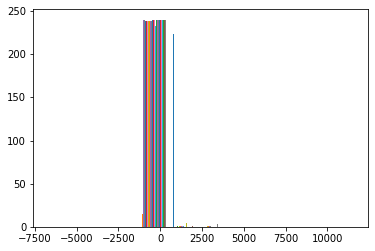

In [139]:
obj60373_datP0 = obj60373 / sky60373_naF
obj60373_datN0 = obj60373 / sky60373_paF
# makefits(obj60373_datN0,"./out/pyobj60373_datN0.fits")
checkdatN = readfitsdata(datapath, "obj60373_datN0_2.fits")
checkdatP = readfitsdata(datapath, "obj60373_datP0_2.fits")

obj60373
#qコマンドと同じデータでそれぞれ割り算する

q_checkdatP = check_obj / checkskynaF
q_checkdatP == checkdatP#一致を確認した。

# obj60373 == check_obj___
# makefits(q_checkdatP, "./out/q_obj60373dat_P.fits")
# makefits(obj60373_datN0, )a 
a = sky60373_naF - checkskynaF
obj60373
b = obj60373_datP0 - q_checkdatP
plt.hist(a[0,0,:,:])
plt.hist(b[0,0,:,:])
c = check_obj - obj60373
# plt.hist(c[0,0,:,:])
plt.hist(obj60373_datP0[0,0,:,:])

In [133]:
# checkdatN_header = readfitsheader(datapath, "obj60373_datN0_2.fits")
# checkdatN_header